In [1]:
from IPython.display import Image

# 웹스크래핑 고급

- 웹사이트에서 바이너리 데이터를 직접 원하는 위치에 다운로드
    - http://yann.lecun.com/exdb/mnist/
- 압축 해제
- 바이너리 데이터 디코딩 처리
    - 전제 : 바이너리 데이터의 구조(포맷)을 알고 있음

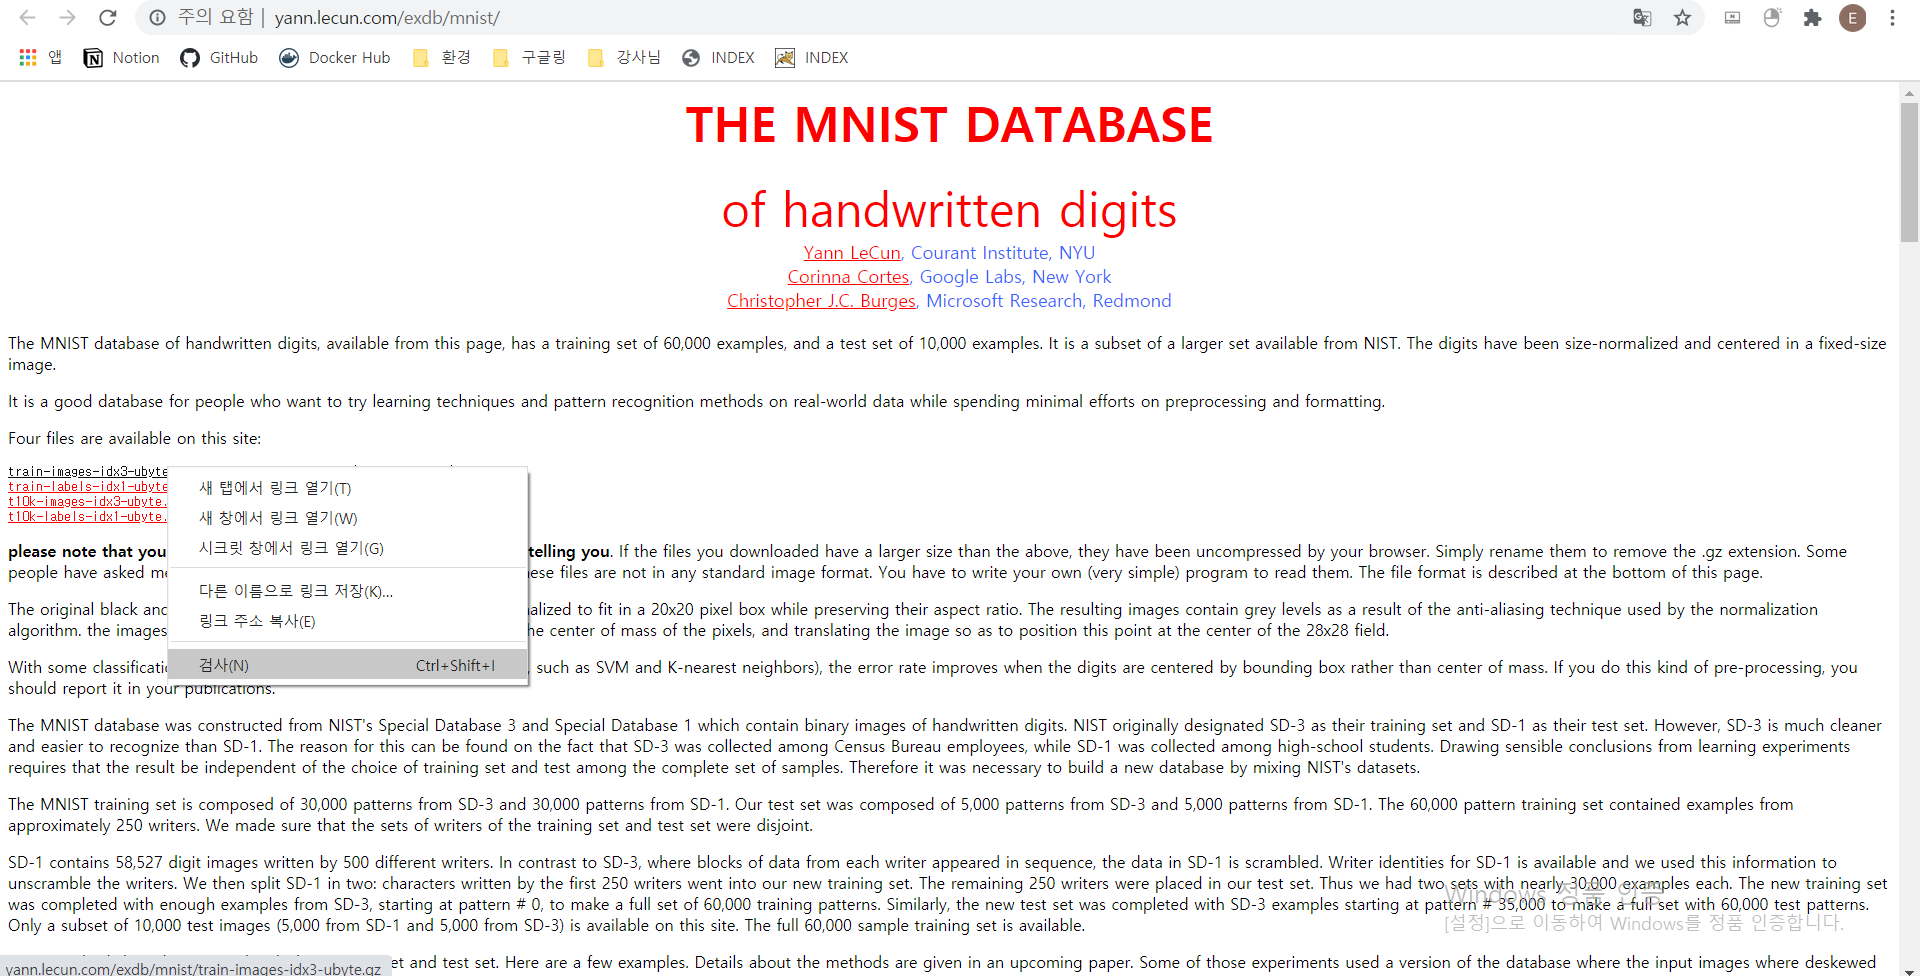

In [2]:
Image('cap/5번 (1).png')

## 1. 데이터 수집

- 해당 사이트에서 *.gz 링크 4개를 획득하시오

In [ ]:
# 1-1. soup 생성
# (1) 모듈 가져오기
from bs4 import BeautifulSoup
from urllib.request import urlopen
# (2) 요청(해당 사이트)
target_url = "http://yann.lecun.com/exdb/mnist/"
res = urlopen(target_url)
# (3) soup 생성
soup = BeautifulSoup(res, 'html5lib')

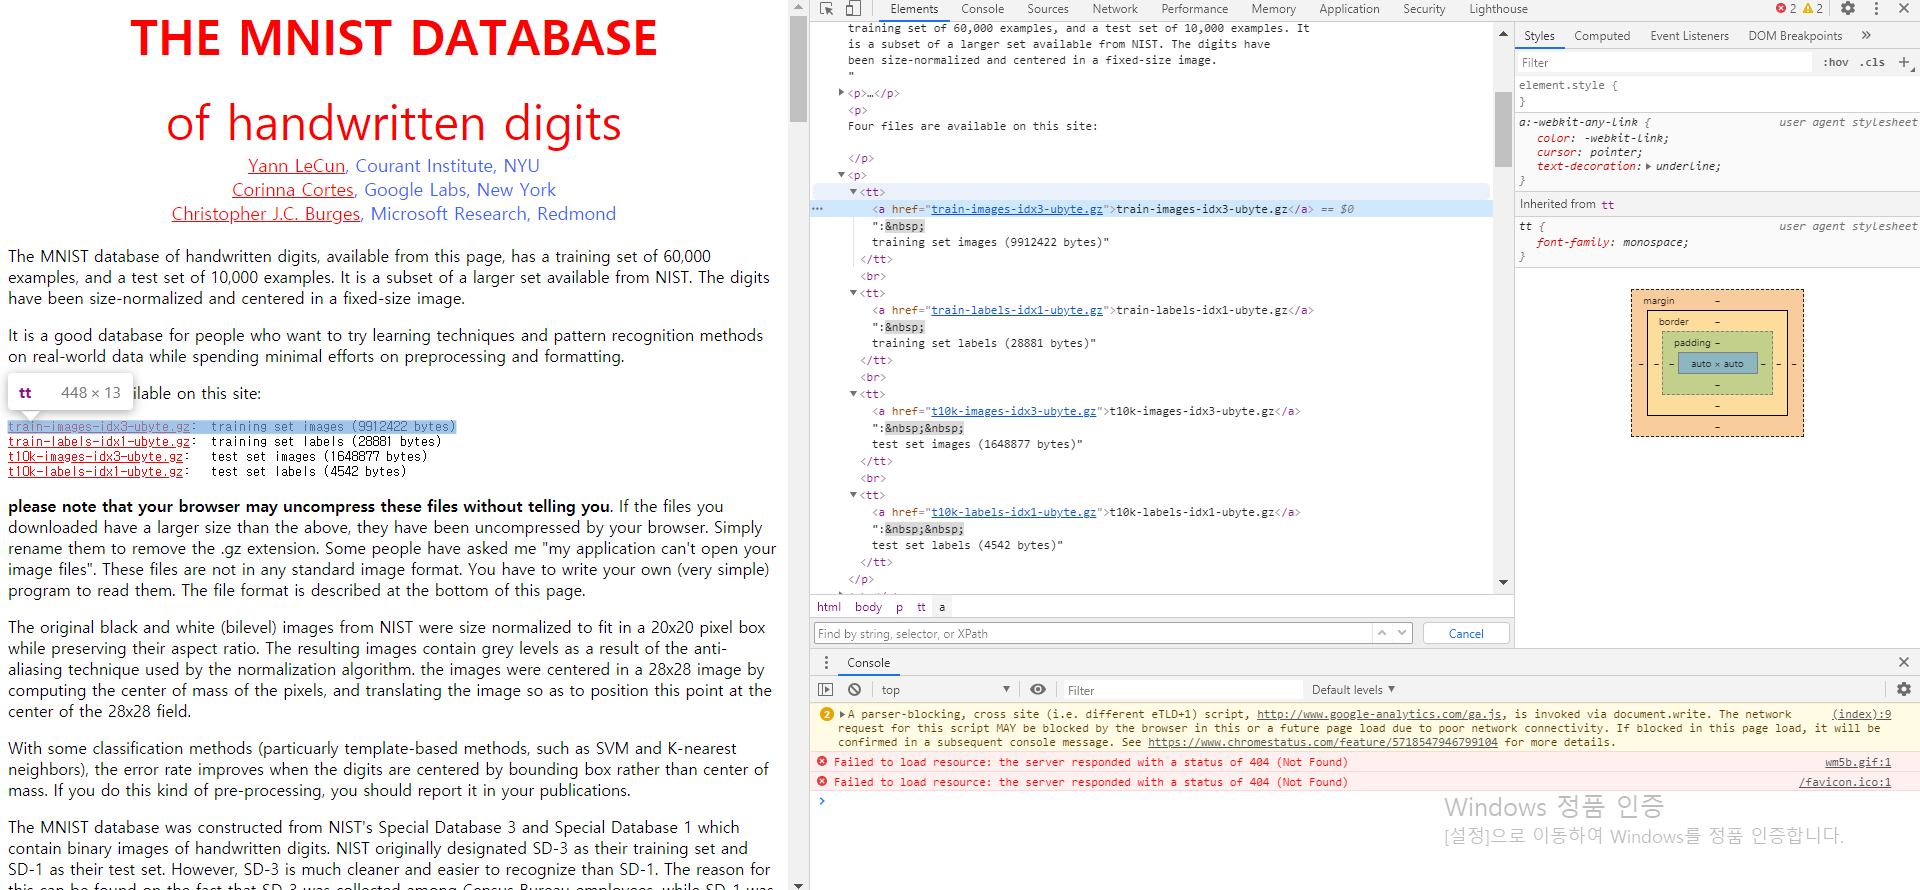

In [3]:
Image('cap/5번 (2).png')

In [ ]:
# 1-2. *.gz 추출

# (1) html을 검사하여 *.gz를 특정(css selector 또는 xpath)
files = list()

for tt in soup.select('tt')[:4] :
    # (2) *.gz 추출
    print(tt.a.string)
    # (3) 다운로드가 가능한 완전한 형태의 URL로 추출 → 조사
    # 다음 단계에서 연속적으로 다운로드 받기 쉽게 만들기 위해 리스트로 구성함
    print(target_url + tt.a.string)
    files.append(target_url + tt.a.string)
    
files

train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

In [ ]:
# line 68에 쓰기 위해 files 리스트 변경

files = list()

for tt in soup.select('tt')[:4] :
    print(tt.a.string)
    print(target_url + tt.a.string)
    files.append(tt.a.string)
    
files

train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


['train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 't10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz']

## 2. 압축 데이터 다운로드

- *.gz 파일(파일 덩어리, 청크파일)을 원하는 위치에 다운로드

In [ ]:
# 2-1. 모듈 가져오기
# import os, os.path, gzip → 3(1)에서 gzip 땡기기로 함
import os, os.path

In [ ]:
# 2-2. 저장된 파일 위치 선정
savedPath = './data/mnist'

# (1) 해당 디렉토리가 없으면 생성
# (1-1) 폴더 체크, False 상황 잡음
if not os.path.exists(savedPath) :
    # (1-2) 디렉토리 생성
    os.makedirs(savedPath)
    print('디렉토리 생성')

In [ ]:
try :
    os.makedirs(savedPath)
except Exception as e:
    print('error', e)
else :
    print('정상적으로 디렉토리를 생성하였습니다')
finally :
    print('무조건 수행')

error [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './data/mnist'
무조건 수행


In [ ]:
# 2-3. 저장
# tqdm은 진행율을 보기 위함
from tqdm import tqdm_notebook

# tqdm 버전 확인
# print(tqdm.__version__)

for file in files :
    print(file)
for file in tqdm_notebook(files) :
    print(file)

train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz



In [ ]:
import tqdm

for file in tqdm.notebook.tqdm(files) :
    print(file)

train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz



In [ ]:
import tqdm
import urllib.request as req

for file in tqdm.notebook.tqdm(files) :
    # (1) 이미 파일이 존재한다면 진행하지 않음
    # 중간에 파일이 중단될 경우(파일 다운로드가 끊김) 문제점이 존재
    local_path = f"{savedPath}/{file}"
    if not os.path.exists("") :
        # 파일 저장
        req.urlretrieve(target_url + file, local_path)
    print(local_path)

./data/mnist/train-images-idx3-ubyte.gz
./data/mnist/train-labels-idx1-ubyte.gz
./data/mnist/t10k-images-idx3-ubyte.gz
./data/mnist/t10k-labels-idx1-ubyte.gz



## 3. 데이터 압축 해제

- gzip 파일 압축 해제
- train-images-idx3-ubyte.gz → 압축해제 → train-images-idx3-ubyte

In [ ]:
# (1) 모듈 가져오기
import gzip

In [ ]:
# (2) 반복적으로 압축파일 풀어서 기록
for file in tqdm.notebook.tqdm(files) :
    # (2-1) 원본파일 경로
    ori_path = f"{savedPath}/{file}"
    # (2-2) 대상파일 경로
    raw_path = f"{savedPath}/{file[:-3]}"
    # (2-3) 압축파일 오픈 → I/O → with → 자동 close()
    with gzip.open(ori_path, 'rb') as fg :
        # (2-3-1)  읽기
        tmp = fg.read()
        # (2-3-2) 저장될 파일을 열어서
        with open(raw_path, 'wb') as f :
            # (2-3-2-1) 기록
            f.write(tmp)
    
    print(ori_path, raw_path)

./data/mnist/train-images-idx3-ubyte.gz ./data/mnist/train-images-idx3-ubyte
./data/mnist/train-labels-idx1-ubyte.gz ./data/mnist/train-labels-idx1-ubyte
./data/mnist/t10k-images-idx3-ubyte.gz ./data/mnist/t10k-images-idx3-ubyte
./data/mnist/t10k-labels-idx1-ubyte.gz ./data/mnist/t10k-labels-idx1-ubyte



## 4. 데이터 디코딩

- 데이터를 읽어서 *.csv에 저장
- 데이터는 2종류
    - 이미지 파일을 뭉쳐놓은 파일(훈련용/테스트용 데이터)
    - 레이블 데이터를 뭉쳐놓은 파일(정답데이터)
    - 스타일(훈련용, 테스트용으로 구분)
- 레이블 파일 포맷
    - 기본적으로 모든 정수값은 high endian / big endian으로 기록되어 있음
    - 최초 4바이트는 매직코드('이 파일은 xxx파일이다'라는 표식)
    - 그 다음 4바이트는 데이터의 총 개수
    - 그 다음부터 1바이트는 정답 데이터(0부터 9까지)
    - 이것을 읽어서 csv(포맷 : 텍스트)에 기록

- 0x12345678, 빅에디언으로 메모리에 기록

|주소|...|0x100|0x101|0x102|0x103|...|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|값|...|0x12|0x34|0x56|0x78|...|

- 0x12345678, 리틀에디언으로 메모리에 기록

|주소|...|0x100|0x101|0x102|0x103|...|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|값|...|0x78|0x56|0x34|0x12|...|

In [ ]:
# 4-1. 모듈 가져오기
# struct가 binary 담당
import struct

In [ ]:
# 디코딩 → *.csv
# 4-2. 파일 오픈, 기본 모드는 읽기모드(r)
with open('./data/mnist/train-labels-idx1-ubyte', 'rb') as f:
    # (1) 매직코드 읽기 → 4byte
    # big endian >, little endian <
    # I : 엘 아니고 대문자 아이, 4바이트 읽는 표식
    magic_code = struct.unpack('>I', f.read(4))
    print(magic_code[0])
    # (2) 아이템의 개수 읽기 → 4byte
    lablel_count = struct.unpack('>I', f.read(4))
    print(lablel_count[0])
    # (3) 아이템(정답, label) 읽기 → 개수만큼 → for문 → 1byte
    # (3-1) csv에 기록
    pass

2049
60000


In [ ]:
# 4바이트를 2번(II) 읽어서 한번에 각각 추출
with open('./data/mnist/train-labels-idx1-ubyte', 'rb') as f :
    magic_code, label_count = struct.unpack('>II', f.read(8))
    print(magic_code)
    print(label_count) 
    pass

2049
60000


In [ ]:
with open('./data/mnist/train-labels-idx1-ubyte', 'rb') as f :
    magic_code, label_count = struct.unpack('>II', f.read(8))
    
    # 0 <= idx < label_count
    for idx in range(label_count) :
        # 1 Byte 추출 → unsigned byte → 부호 없는 바이트 : 0 ~ 255 (2^8-1)
        label = struct.unpack('B', f.read(1))
        print(label[0])
        break
    pass

5


In [ ]:
# train-labels-idx1-ubyte의 파일 크기는?
# magic code + label의 총 개수 + 데이터
f'{4 + 4 + 60000}bytes'

'60008bytes'

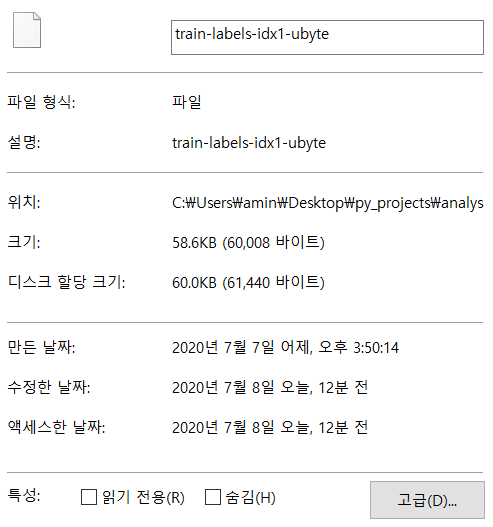

In [4]:
Image('cap/5번 (3).png')

In [ ]:
# train-labels-idx1-ubyte.csv에 정답을 추출해서 기록한다(파일생성)
with open('./data/mnist/train-labels-idx1-ubyte', 'rb') as f :
    # 4-2-0-1. csv 파일 오픈
    with open(f"{savedPath}/train-labels-idx1-ubyte.csv", 'w') as fp :
        magic_code, label_count = struct.unpack('>II', f.read(8))
        for idx in range(label_count) :
            label = struct.unpack('B', f.read(1))
            # print(label)
            fp.write(str(label[0]) + '\n')
            break
        pass

In [ ]:
# 위랑 같은 방법인데 튜플만 분해한 것
with open('./data/mnist/train-labels-idx1-ubyte', 'rb') as f :
    with open(f"{savedPath}/train-labels-idx1-ubyte.csv", 'w') as fp :
        magic_code, label_count = struct.unpack('>II', f.read(8))
        for idx in range(label_count) :
            (label,) = struct.unpack('B', f.read(1))
            # print(label)
            fp.write(str(label) + '\n')
            #break
        pass

In [ ]:
# 이미지 데이터의 크기(bytes → 8 곱하면 비트로 변환)
# magic code + image 개수 + image의 h + image의 w + (image의 가로크기(px) * image의 세로크기(px) * 60000개)
# image의 가로크기/세로크기, 60000 → 읽어서 알게된 값
4 + 4 + 4 + 4 + (28 * 28 * 60000)

47040016

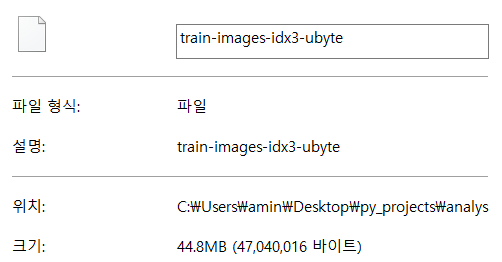

In [5]:
Image('cap/5번 (4).png')

In [ ]:
# 이미지가 뭉쳐서 있는 덩어리 파일 오픈
with open('./data/mnist/train-images-idx3-ubyte', 'rb') as f:
    # 1. magic code, image 개수, image의 높이/가로 : >IIII
    _, imgCnts, img_h, img_w = struct.unpack('>IIII', f.read(4*4))
    print(_, imgCnts, img_h, img_w)
    pass

2051 60000 28 28


In [ ]:
with open('./data/mnist/train-images-idx3-ubyte', 'rb') as f:
    _, imgCnts, img_h, img_w = struct.unpack('>IIII', f.read(4*4))
    # 이미지 1개 총 데이터 크기, 총 픽셀의 개수
    pixels = img_h * img_w
    for idx in range(imgCnts) :
        # 이미지를 파일로 저장, pgm 파일
        # 이미지 1개당 데이터 크기는? img_h * img_w
        header = 'P2 28 28 255\n'
        # 1 byte 단위로 pixel만큼 읽어야 하는데, 데이터 자체가 1 ubyte이므로 ordering이 필요 없음
        body = f.read(pixels)
        # body를 봤더니 bytes로 표현된 문자열임 → 하나하나를 문자열로 처리 → 문자열 사이사이에 공백 삽입
        tmp = list(map(str, body))
        # list상에 존재하는 모든 요소를 하나의 문자열로 만드는데 그 사이에 공백을 구분자로 넣어서 한개의 문자열로 만들겠음
        src = header + ' '.join(tmp) + '\n'
        with open('test.pgm', 'w', encoding = 'utf-8') as fp :
            fp.write(src)
        break

- pgm 뷰어 : http://paulcuth.me.uk/netpbm-viewer/  

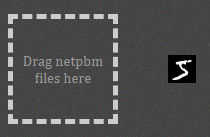

In [6]:
Image('cap/5번 (5).png')

In [ ]:
# a의 구성원을 하나씩 꺼내서 int로 변경해서 list에 담겠다
# lambda 함수를 활용
a = '123456789'
list(map(lambda x : int(x), a))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# 내장함수를 활용
list(map(int, a))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# custom 함수 사용
def myInt(x) :
    return int(x)
list(map(myInt, a))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
b = list(a)
' '.join(b)

'1 2 3 4 5 6 7 8 9'